<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit6/NeevS_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

It doesnt mean anything because for us to tell whether the model is good or bad, we need it to be in comparison of another model. You might ask well if we look at the elpd_loo for a model, we can just see whether the number is super negative or not, but that does not work because all values will be super negative and will be different per data set. So one bad negative value for one data set might be a good value in another. However, we can't tell whether it is a good or bad value without comparing it to another model with the same data set.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a machine learning model learns the training data too well so that it learns the underlying patterns of the data, but it also learns all of the noise and random fluctuations that occurs which are irrelevant to generating new data.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by adding regularizing priors and/or using less predictors/variables. By using less predictors/variables, we mitigate overfitting because we now use variables that affect the most relevant features of the models which makes it harder for the model to catch on the more irrelevant patterns. Adding regularizing priors helps because the model can't catch on to the extereme values as much which decreases overfitting. We can also use casual diagrams to mitigate overfitting because if we have variables in our model that is not in our casual diagram, then we know we are over fitting.

**Task4**:

How do we mitigate underfitting?

We can mitigate underfitting by selecting models based on the elpd_loo value. By using the elpd_loo values, we are selecting a model based on the highest elpd_loo value which correlates with how accurate the model is. If we choose the highest elpd_loo value model, that means that model is the most accurate, helping mitigate underfitting. We can also use casual diagrams for this because if there are variables in our casual diagrams that we did not include in our model, we can tell that we are underfitting.

**Task5**:

Why would we want more than one predictor in a model?

By using more than one predictor in a model, we increase the accuracy of the model because we are including more information that is relevant to the outcome. Having only one predictor most of the time cannot explain or account for the variability in the model, so using multiple predictors gives multiple sources of information which helps account for the variance within the data and model. Also by creating and looking at a casual diagram, we can see that more than one variable affects the outcome of the thing that we are looking at which explains why we would want more than one predictor.

**Task6**:

Can we have too many predictors? How would we know?

Yes, it is possible for there to be too many predictors in a model. How would we know then? well, the first indicator is if there is overfitting in the model. We want our model to capture the common pattern that is seen within the data points, if we add to many predictors, it can start to account for too many of the fluctuations within the data so that it starts to look more like connect the dots instead of a curve, which is overfitting. To test this, just check if the model is able to predict test data outside of the obsereved data. Also having too many predictors can also make it hard for someone to understand the model. By having too many, it is harder to tell which variables are important and how each one affects the outcome. Also using a casual diagram, we can see that we have too many variables if we are including variables that does not affect the outcome of the thing we are modeling.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of identifying and choosing predictors that contribute the most to the model's performance. The idea is to include variables that provide meaningful information while excluding ones that add noise or redundancy.

The process for variable selection is:

Variable selection involves building multiple models with different combinations of predictors and comparing their ELPD_LOO values to determine the best one. You can start off with a model that includes all predictors and then go from there after seeing how the model performs. You can also use Causal diagrams to help with variable selection by providing a organized visualization of how predictors relate to each other and whether they are interconnected.


**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**First Model**: The intercepts vary across groups, but all predictors share the same global slope. This means that while each group starts at a different point, the rate of change for the predictors is consistent across all groups.

**Second Model**: Both the intercepts and slopes vary across groups. The hierarchy allows slopes to differ within each group, but they are still somewhat related to a global pattern, so they’re not entirely independent.

**Third Model**: There is no global slope in this setup. Each predictor’s slope is influenced by the others, allowing for much more flexibility. The relationships between variables are not tied to a single overarching pattern, making this model highly adaptable.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models using:

2D scatter plots for simpler cases, with one predictor on the x-axis and the outcome on the y-axis.
3D scatter plots or surface plots for models with two predictors.
Interaction plots to visualize how one predictor's effect changes depending on another predictor's value.
It is challenging to visualize the entire model at once if there are more than two or three predictors. In such cases, we rely on partial dependency plots, coefficient plots, or marginal effect visualizations to break the model into digestible pieces.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-5m_r8ir2
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-5m_r8ir2
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

**Predictors free throw percentage and position (with position as a categorical predictor)**

In [6]:
model_1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_1 = model_1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

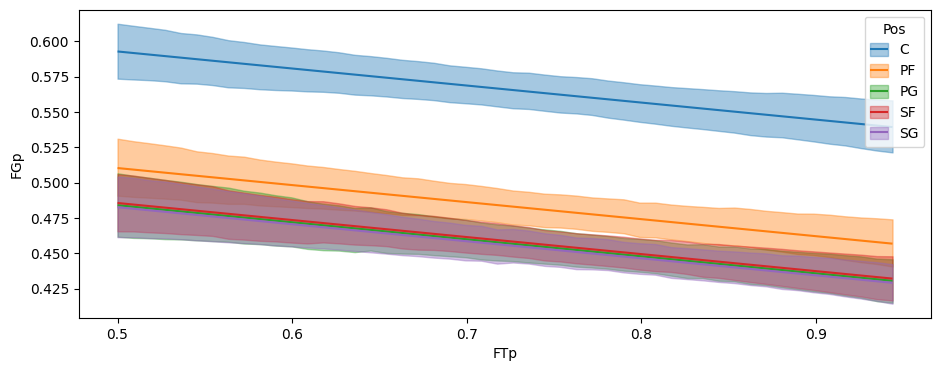

In [7]:
bmb.interpret.plot_predictions(model_1,
                               idata_1,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

**Predictors free throw percentage and position (with position as a hierarchy)**

In [8]:
model_2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_2 = model_2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 38 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

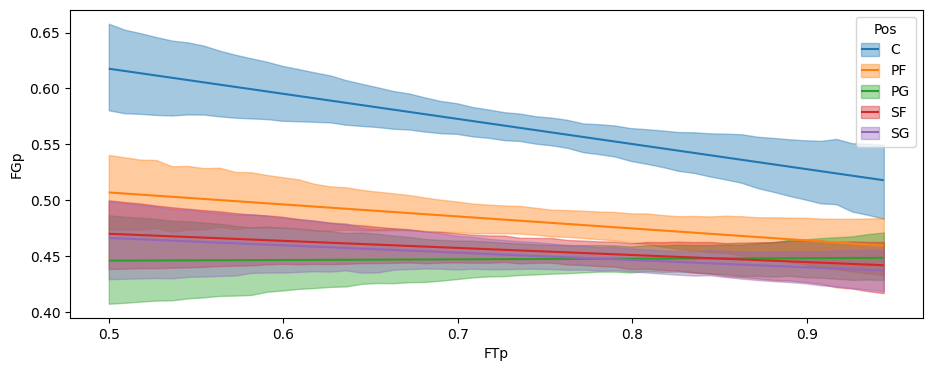

In [9]:
bmb.interpret.plot_predictions(model_2,
                               idata_2,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

**Predictors free throw percentage and position (with position interacting with frew throw percentage)**

In [10]:
model_3 = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

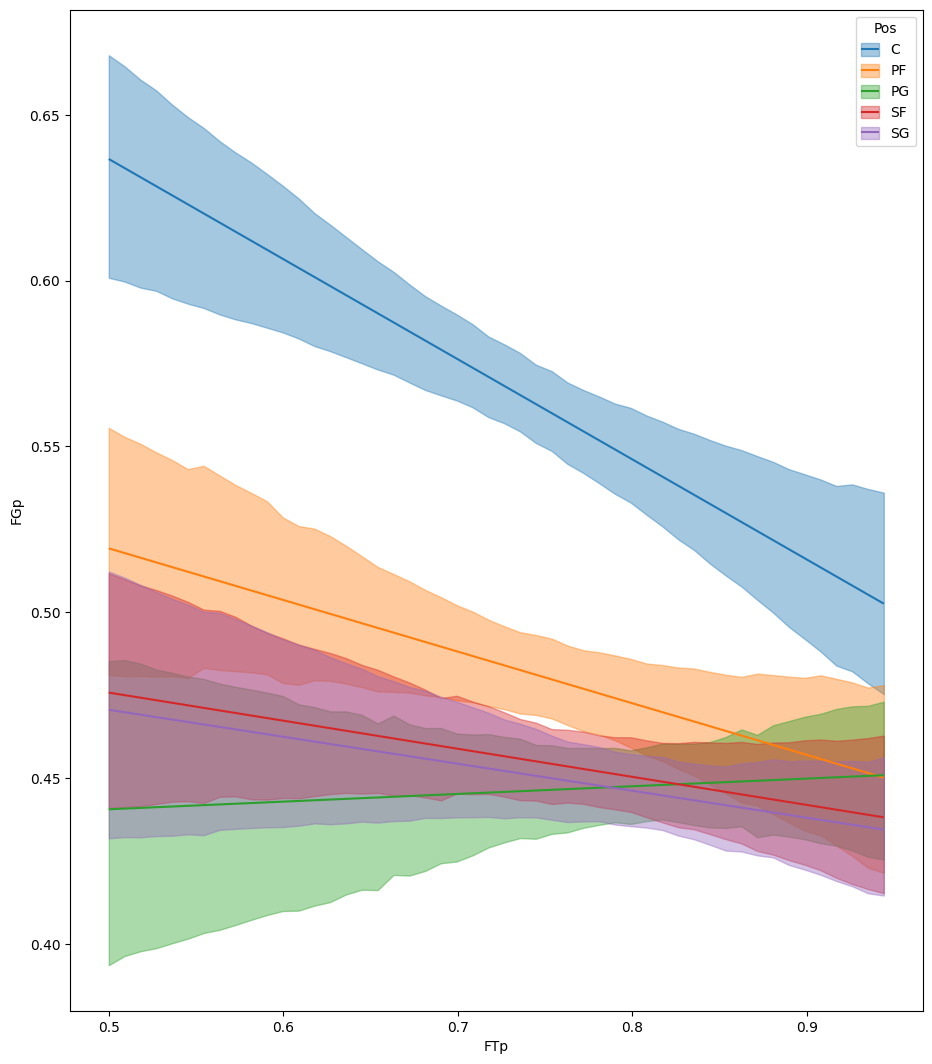

In [17]:
bmb.interpret.plot_predictions(model_3,
                               idata_3,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors**

In [15]:
model_4 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `FTp`:`3PA` + `FTp`:`Pos` + `3PA` : `Pos`", data=bb)
idata_4 = model_4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

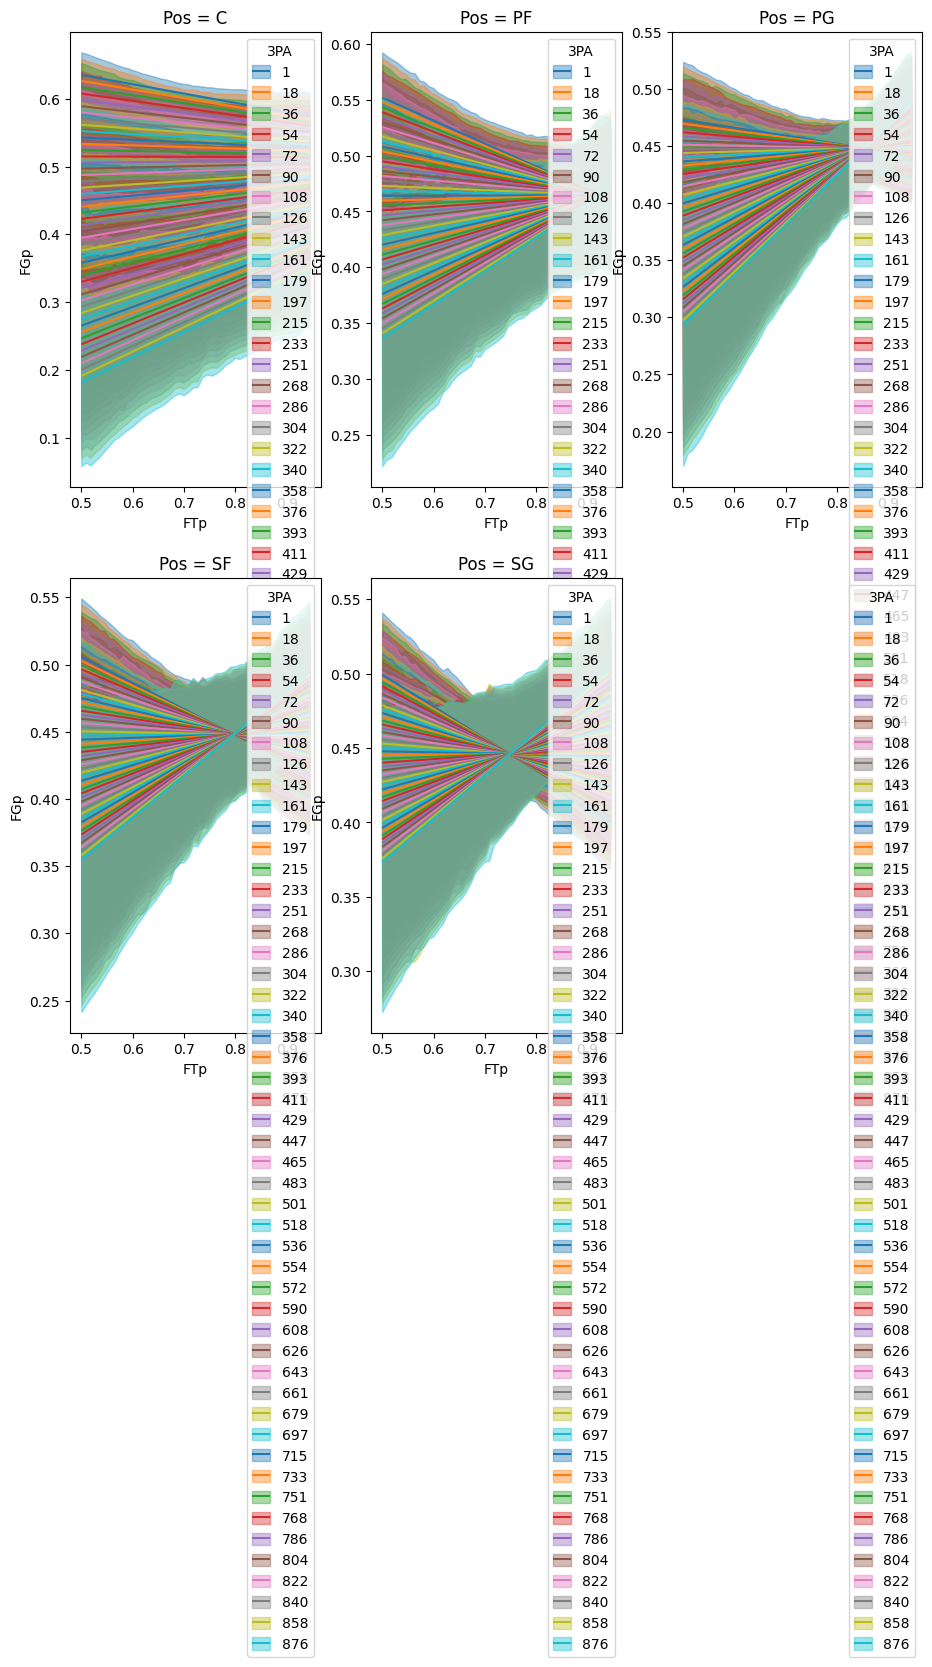

In [18]:
bmb.interpret.plot_predictions(model_4,
                               idata_4,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion**

In [19]:
model_5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
idata_5 = model_5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

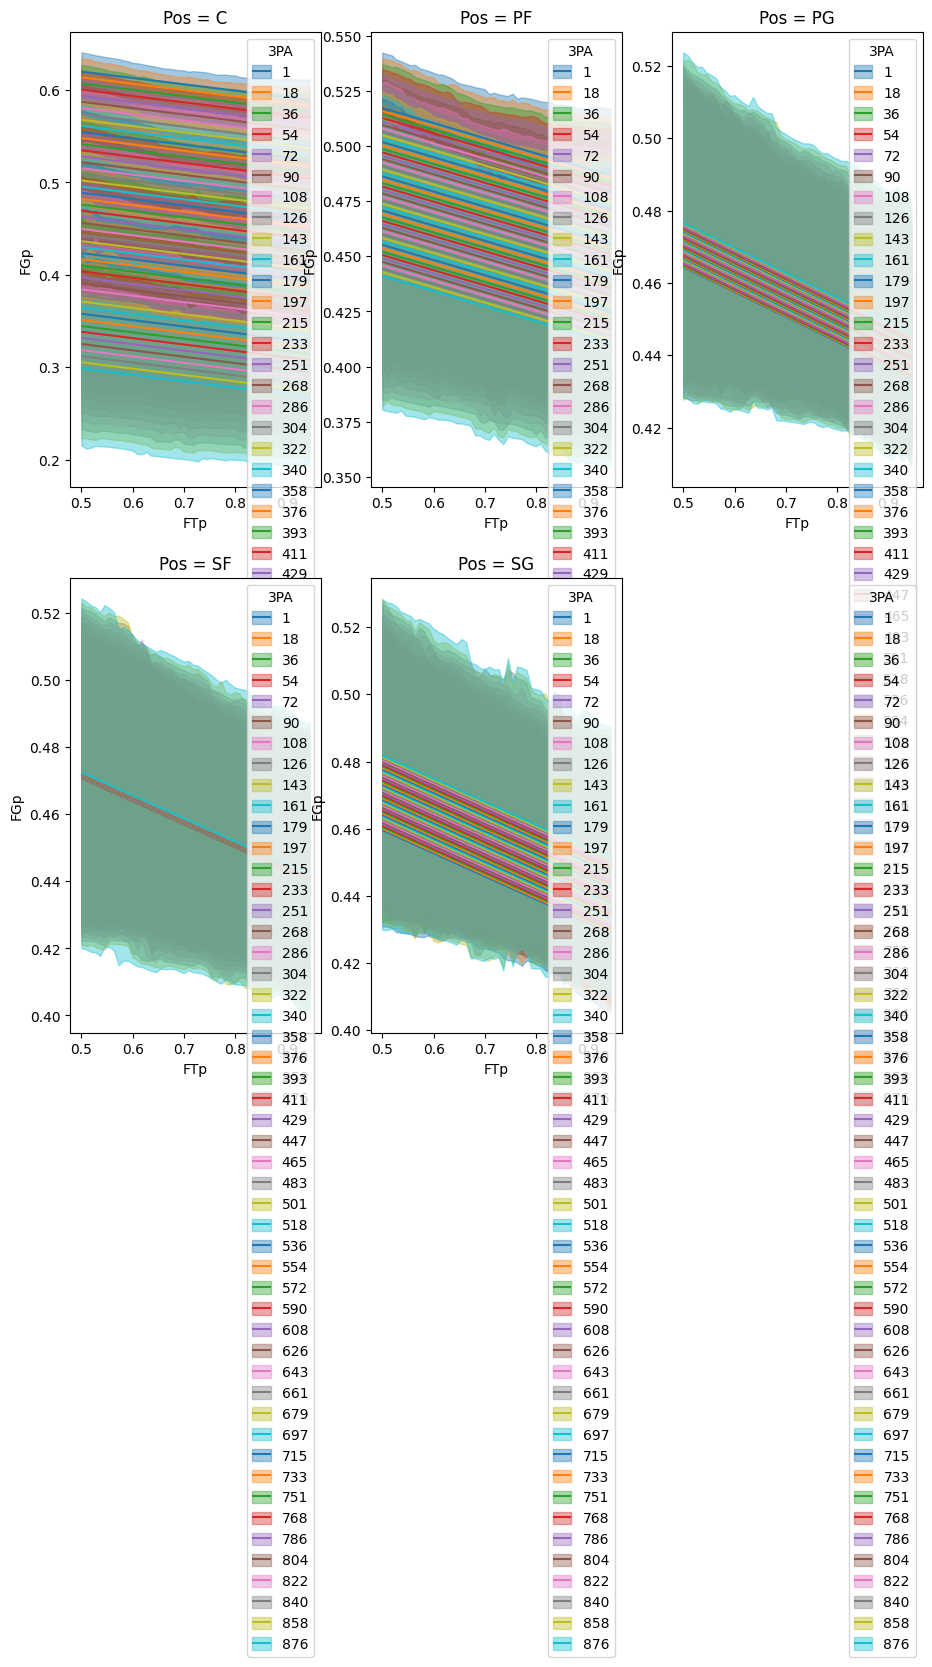

In [20]:
bmb.interpret.plot_predictions(model_5,
                               idata_5,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

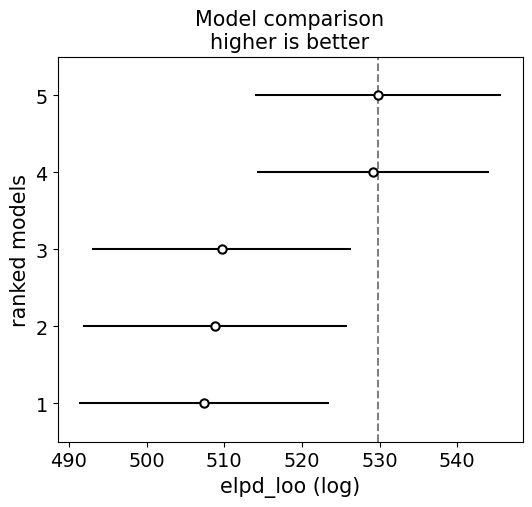

In [21]:
cmp = az.compare({"1":idata_1,"2":idata_2, "3":idata_3, "4":idata_4, "5": idata_5})
az.plot_compare(cmp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Based on the elpd_loo metric, Model 5—which includes an interaction between 3-point attempts (3PA) and position (Pos)—performs the best, narrowly surpassing Model 4, which incorporates interactions among all predictors. This suggests that the relationship between 3PA and Pos is significant, enhancing predictive accuracy. In contrast, the interaction between free throw percentage (FTp) and Pos in Model 3 appears less impactful, indicating a weaker relationship between these variables. Therefore, including the 3PA and Pos interaction contributes more to the model's performance than the FTp and Pos interaction.